<style>
  body {
    margin: 0;
    padding: 0;
    font-family: Arial, sans-serif;
  }

  /* Linha das logos usando table layout */
  .cover-header {
    display: table;
    width: 100%;
    margin-top: 20px;
    table-layout: fixed;
  }

  .cover-header .left{
    display: table-cell;
    width: 20%;
    vertical-align: middle;
    text-align: center;
  }
  .cover-header .right {
    display: table-cell;
    width: 30%;
    vertical-align: middle;
    text-align: center;
  }

  .cover-header .center {
    display: table-cell;
    width: 50%;
    text-align: center;
    vertical-align: middle;
  }

  .cover-header img {
    max-height: 55px;
    width: auto;
    display: inline-block;
  }

  /* Texto institucional embaixo das logos */
  .cover-center {
    text-align: center;
    margin-top: 20px;
    vertical-align: middle;
  }

  .cover-center p {
    text-align: center;
    vertical-align: middle;
    margin: 0;
    font-weight: 700;
    line-height: 1.4;
    font-size: 16px;
  }

  /* Título e autor */
  .cover-title {
    margin-top: 120px;
    text-align: center;
  }

  .cover-title h1 {
    font-size: 28px;
    margin-bottom: 60px;
  }

  .cover-title .author {
    font-size: 18px;
    margin-top: 160px; /* nome bem mais abaixo */
  }

  /* Rodapé fixo */
  .cover-footer {
    position: absolute;
    bottom: 30px;
    left: 0;
    width: 100%;
    text-align: center;
    font-size: 14px;
  }

  .cover-footer {
  position: absolute;
  bottom: 30px;
  left: 0;
  width: 100%;
  text-align: center;
  font-size: 14px;
}

</style>

<div class="cover-header">
  <div class="left">
    <img src="Imagens/logo_virtus2.png" alt="Logo VIRTUS">
  </div>
  <div class = "center"></div>
  <div class="right">
    <img src="Imagens/logo_ufcg.png" alt="Logo UFCG">
  </div>
</div>

<div class="cover-center">
  <p>
    UNIVERSIDADE FEDERAL DE CAMPINA GRANDE<br>
    CENTRO DE CIÊNCIAS E TECNOLOGIA<br>
    CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁTICA<br>
    CENTRO DE COMPETÊNCIAS EMBRAPII VIRTUS-CC
  </p>
</div>

<div class="cover-title">
  <h1>Trasnformadas Discretas</h1>
  <p class="author">Jezrael Pereira Filgueiras</p>
</div>

<div class="cover-footer">
  Campina Grande, 19 de setembro de 2025
</div>

<div style="page-break-after: always;"></div>

<style>
#toc ol {
  counter-reset: item;
  list-style-type: none;
  padding-left: 1.2em;
}
#toc li {
  display: block;
}
#toc li:before {
  content: counters(item, ".") " ";
  counter-increment: item;
}
</style>

<div id="toc">
  <h2>Sumário</h2>
  <ol>
    <li><a href="#1-introducao">Introdução</a></li>
    <li>
      <a href="#2-desenvolvimento">Desenvolvimento</a>
      <ol>
        <li>
          <a href="#21-fundamentacao">Fundamentação teórica</a>
          <ol>
            <li><a href="#211-dft">Transformada discreta de Fourier (DFT)</a></li>
            <li><a href="#212-convolucaocircular">Convolução circular</a></li>
            <li><a href="#213-addandsave">Métodos para implementação em tempo real</a></li>
            <li><a href="#214-fft">Transformada rápida de Fourier (FFT)</a></li>
          </ol>
        </li>
        <li>
          <a href="#22-materiais">Materiais e método</a>
          <ol>
            <li><a href="#221-dft">Transformada discreta de Fourier (DFT)</a></li>
            <li><a href="#222-convolucaocircular">Convolução circular</a></li>
            <li><a href="#223-addandsave">Métodos para implementação em tempo real</a></li>
            <li><a href="#224-fft">Transformada rápida de Fourier (FFT)</a></li>
          </ol>
        </li>
      </ol>
    </li>
    <li>
      <a href="#3-resultados">Resultados e discussões</a>
      <ol>
        <li><a href="#31-dft">Transformada discreta de Fourier (DFT)</a></li>
        <li><a href="#32-convolucaocircular">Convolução circular</a></li>
        <li><a href="#33-addandsave">Métodos para implementação em tempo real</a></li>
        <li><a href="#34-fft">Transformada rápida de Fourier (FFT)</a></li>
      </ol>
    </li>
    <li><a href="#conclusao">Conclusão</a></li>
    <li><a href="#referencias">Referências</a></li>
  </ol>
</div>

<div style="page-break-after: always;"></div>

<a id="1-introducao"></a>
# 1. Introdução

Em sistemas computacionais, a análise espectral de um sinal discretizado não pode ser realizada pelo uso da transformada de Fourier de tempo discreto (DTFT), porque o espectro é contínuo. Para possibilidar o processamento digital é necessário discretizar o espectro obtido. A transformada de Fourier discreta (DFT), é um algoritmo que corresponde a essa dicretização. Ela é essencial para a análise de espectros de sinais e sistemas em tempo discreto, no entanto, possui complexidade $O(N^2)$. Isso quer dizer que o número de operações realizadas, e consequentemente, o tempo necessário para processamento possui uma relação quadrática com o número de amostras do sinal. Nesse contexto, surge o algoritmo da transformada rápida de Fourier (FFT), que aproveita as simetrias presentes no algoritmo da DFT, de modo a reduzir o número de operações a uma complexidade $O(NlogN)$. Esse algoritmo é imprescindível, pois seria imprativável o processamento digital de sinais com o algoritmo com relação quadrática da DFT.

<a id="2-desenvolvimento"></a>
# 2. Desenvolvimento

<a id="21-fundamentacao"></a>
## 2.1 Fundamentação teórica

<a id="211-dft"></a>
### 2.1.1 Transformada de Fourier discreta (DFT)

A transformada de Fourier discreta é caracterizada como sendo o processo de amostragem da transformada de Fourier, periódica em $2\pi$ tomando-se N amostras uniformemente espaçadas entre 0 e $2\pi$. Utilizando as frequências $\omega _k = (2\pi /N) k, \quad k \in \mathbb{Z}$, tal que:

$$
X'(e^{j\omega}) = X(e^{j\omega}) \sum_{k=-\infty}^{\infty} \delta\left(\omega - \frac{2\pi}{N}k\right) \tag{1.1}
$$

Aplicando o teorema da convolução e a transformada inversa às amostras obtidas, nós podemos relacionar o sinal $x(n)$, cujo espectro é $X(j\omega)$, com o sinal $x'(n)$ obtido a partir da amostragem do espectro do sinal $x(n)$ de tamanho L como um trem de impulsos ponderados, da seguinte forma:

$$
x'(n) = x(n) * \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} \delta(n - Np) = \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} x(n - Np) \tag{1.2}
$$

Essa equação mostra que o sinal $x'(n)$ é composto por repetições periódicas do sinal discreto original $x(n)$, em que o período é dado por $N$. Logo, o sinal só pode ser recuperado se seu comprimento $L\leq N$.

Podemos recuperar o sinal discreto original a partir das amostras de seu espectro pela relação:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X\left(e^{j\left(\frac{2\pi}{N}\right)k}\right) e^{j\left(\frac{2\pi}{N}\right)kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{1.3}
$$

Essa relação é conhecida como Transformada de Fourier Discreta Inversa (IDFT)

Se definirmos $W_N = e^{-j2\pi /N}$, as definições da DFT e da IDFT se tornam:

$$
X(k) = \sum_{n=0}^{N-1} x(n)\, W_N^{kn}, \quad \text{para } 0 \leq k \leq N - 1. \tag{1.4}
$$

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k)\, W_N^{-kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{1.5}
$$

em que tanto $x(n)$ como $X(k)$ são periódicas com período N.

Considere a DFT do conjugado do espectro $X[k]$:

$$
\mathcal{F}(X^*[k])[m] = \sum_{k = 0}^{N-1} X^*[k]\, {W_N^{-km}} \tag{1.6}
$$

Agora, tomando o conjugado dessa expressão, obtemos:

$$
\mathcal{F}(X^*[k])[m]
= \sum_{k=0}^{N-1} X^*[k]\, W_N^{-km}
= \sum_{k=0}^{N-1} X[k] \, W_N^{km} \tag{1.7}
$$

Essa expressão é idêntica à expressão da IDFT, excetuando-se apenas o fator $1/N$. De modo que podemos escrever a IDFT de uma sequência $X[k]$ como:

$$
IDFT(X) = \frac1N \mathrm{conj}(DFT(\mathrm{conj}(X))) \tag{1.8}
$$

Três propriedades da DFT são de particular interesse, a periodicidade e a simetria hermitiana da DFT, e a propriedade que relaciona a multiplicação entre os espectros de dois sinais com a sua convolução circular no domínio do tempo.

#### **Periodicidade**

A DFT de um sinal discreto de comprimento $N$ é **periódica** com período $N$ no índice de frequência $k$:

$$
X[k + N] = X[k], \quad \forall k \in \mathbb{Z} \tag{1.9}
$$

Isso significa que o espectro obtido pela DFT se repete indefinidamente a cada $N$ amostras no eixo de frequência.  
Na prática, ao calcular a DFT, obtemos apenas um período fundamental, e qualquer índice fora do intervalo $0 \leq k \leq N-1$ é equivalente a um índice dentro desse intervalo.

#### **Simetria hermitiana**

Quando o sinal no domínio do tempo $x[n]$ é **real**, sua DFT apresenta **simetria hermitiana**:

$$
X[k] = X^*[-k \ (\text{mod } N)] \tag{1.10}
$$

onde $X^*$ denota o conjugado complexo de $X$.

Essa propriedade implica que:

- **Magnitude:** é simétrica em relação a $k = 0$ (ou $f = 0$ Hz):

$$
|X[k]| = |X[-k \ (\text{mod } N])| \tag{1.11}
$$

- **Fase:** é anti-simétrica:

$$
\angle X[k] = -\angle X[-k \ (\text{mod } N]) \tag{1.12}
$$

<a id="212-convolucaocircular"></a>
### 2.1.2 Convolução Circular

#### Convolução Linear

A convolução linear entre dois sinais $x[n]$ e $h[n]$, de tamanhos $L_x$ e $L_h$, respectivamente, é definida como:

$$
y[n] = \sum_{k=0}^{L_x-1} x[k] \cdot h[n - k] \tag{2.1}
$$

O resultado tem tamanho $L_y = L_x + L_h - 1$, como discutido no notebook de sinais e sistemas no tempo discreto.

#### Convolução Circular

A convolução circular assume que os sinais são **periódicos** com período $N$, de modo que:

$$
y(n) = \sum_{l=0}^{n} x(l) \cdot h(n - l) + \sum_{l=n+1}^{N-1} x(l) \cdot h(n - l + N), \quad \text{para } 0 \leq n \leq N - 1 \tag{2.2}
$$

Sabe-se que a transformada de Fourier da convolução de duas sequências é o produto das transformadas das sequências. No entanto, ao utilizarmos a DFT para essa operação, e então a IDFT, o processo de amostragem na frequência faz com que as sequências se tornem periódicas no tempo. A equação (2.2) mostra como a IDFT do produto dos espectros das sequências resulta na convolução linear entre as sequências originais e a versão periódica anterior de uma delas.

Para que as equações (2.1) e (2.2) sejam equivalentes, e obtenhamos uma convolução linear a partir da IDFT, é necessário que o segundo somatório da equação (2.2) seja nulo. Assumindo que as duas sequências originais possuem duração $L$ e $K$ amostras, esse somatório será nulo para: $N \ge L + K - 1$.

Ou seja, o tamanho da DFT deve ser grande o suficiente para que a versão periódica anterior da sequência não interfira na convolução da sequência atual.


<a id="213-addandsave"></a>
### 2.1.3 Implementação em tempo real

Em sistemas de processamento digital de sinais (DSP), especialmente em aplicações de tempo real como áudio, radar e comunicações, é comum que os sinais sejam processados em blocos sucessivos. A convolução linear direta entre um sinal de entrada $x[n]$ e uma resposta ao impulso $h[n]$ de comprimento $M$ possui complexidade computacional $\mathcal{O}(NM)$, o que pode ser inviável para sinais longos ou sistemas com restrições de tempo. Para mitigar esse custo, empregam-se os métodos **Overlap-Add (OLA)** e **Overlap-Save (OLS)**, que utilizam a Transformada Discreta de Fourier (DFT) para realizar convoluções de forma eficiente, com complexidade reduzida para $\mathcal{O}(N \log N)$ via Fast Fourier Transform (FFT).

Ambos os métodos exploram a propriedade de que a convolução circular no domínio do tempo corresponde à multiplicação ponto a ponto no domínio da frequência. No entanto, como a DFT é naturalmente periódica, é necessário aplicar estratégias que permitam recuperar a convolução linear desejada a partir da convolução circular obtida.

#### Overlap-Add (OLA)

O método Overlap-Add consiste em segmentar o sinal de entrada $x[n]$ em blocos de comprimento $L$, tal que $L \leq N - M + 1$, onde $N$ é o tamanho da DFT e $M$ é o comprimento da resposta ao impulso. Cada bloco é então estendido com zero-padding até o comprimento $N$, permitindo que a convolução circular entre o bloco e $h[n]$ coincida com a convolução linear.

A saída de cada bloco convoluído é então somada às regiões sobrepostas da saída anterior, conforme ilustrado pela expressão:

$$
y[n] = \sum_{r=0}^{R-1} y_r[n - rL] \tag{3.1}
$$

onde $y_r[n]$ representa a saída convoluída do bloco $r$, e $R$ é o número total de blocos. A soma nas regiões de sobreposição garante a continuidade temporal do sinal convoluído.

Este método é particularmente eficiente quando a resposta ao impulso é longa e o sinal de entrada é processado em blocos curtos, como em sistemas de streaming.

#### Overlap-Save (OLS)

O método Overlap-Save, por sua vez, utiliza blocos de entrada de comprimento $N$, com sobreposição de $M - 1$ amostras entre blocos consecutivos. Cada bloco contém $L = N - M + 1$ amostras novas e $M - 1$ amostras anteriores, que são necessárias para preservar a resposta completa da convolução.

Após a convolução circular via DFT, os $M - 1$ primeiros pontos da saída são descartados, pois contêm aliasing decorrente da periodicidade da DFT. Os $L$ pontos restantes constituem a saída válida do bloco:

$$
y_r[n] = \text{IDFT}\left( \text{DFT}(x_r[n]) \cdot \text{DFT}(h[n]) \right)[M : N-1] \tag{3.2}
$$

A concatenação dos blocos válidos $y_r[n]$ forma a saída total do sistema. O método Overlap-Save é geralmente mais eficiente em termos de memória, pois evita o uso de zero-padding e realiza menos operações de soma entre blocos.

<a id="214-fft"></a>
### 2.1.4 Transformada Rápida de Fourier (FFT)

A Transformada Discreta de Fourier (DFT) é uma ferramenta fundamental na análise de sinais no domínio da frequência. No entanto, sua implementação direta possui complexidade computacional $\mathcal{O}(N^2)$, o que se torna impraticável para sinais de grande comprimento. Para superar essa limitação, foi desenvolvido o algoritmo da **transformada rápida de Fourier (FFT)**, que reduz a complexidade para $\mathcal{O}(N \log N)$, tornando viável o processamento eficiente em tempo real. Em aplicações reais, a convolução entre dois sinais é feita a partir da multiplicação de seus respectivos espectros na frequência. Para que esse processo seja mais eficiente que o algoritmo da convolução, o alforitmo da FFT é absolutamente necessário.

Existem duas abordagens principais para a FFT: **decimação no tempo (DIT)** e **decimação na frequência (DIF)**. Ambas exploram a estrutura recursiva da DFT, mas diferem na forma como os dados são reorganizados e processados. Neste trabalho, dar-se-á ênfase à abordagem de decimação na frequência da FFT.

#### Algoritmo de Decimação em Frequência (DIF)

O algoritmo de decimação em frequência parte da expressão da DFT:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot W_N^{kn}, \quad \text{com } W_N = e^{-j\frac{2\pi}{N}} \tag{4.1}
$$

A ideia central do DIF é dividir a DFT de tamanho $N$ em duas DFTs de tamanho $N/2$, separando os índices de frequência pares e ímpares.  Para isso, reescrevemos a DFT como:

$$
X[k] = \sum_{n=0}^{N/2 - 1} \left[ x[n] + x[n + N/2] \cdot W_N^k \right] \cdot W_{N/2}^{kn} \tag{4.2}
$$

Agora, pode-se calcular  separadamente as amostras pares e ímpares do espectro:

$$
\begin{aligned}
X(2l) &= \sum_{n=0}^{\frac{N}{2} - 1} \left[ x(n) + W_N^{nl} \, x\left(n + \frac{N}{2}\right) \right] W_N^{2nl} \\
      &= \sum_{n=0}^{\frac{N}{2} - 1} \left[ x(n) + x\left(n + \frac{N}{2}\right) \right] W_N^{2nl} \tag{4.3}
\end{aligned}
$$

Para a sequência par, e :

$$
\begin{aligned}
X(2l+1) &= \sum_{n=0}^{\frac{N}{2} - 1} \left[ x(n) + W_N^{(2l+1)\frac{N}{2}} \, x\left(n + \frac{N}{2} \right) \right] W_N^{(2l+1)n} \\
        &= \sum_{n=0}^{\frac{N}{2} - 1} \left[ x(n) - x\left(n + \frac{N}{2} \right) \right] W_N^{(2l+1)n} \\
        &= \sum_{n=0}^{\frac{N}{2} - 1} \left[ x(n) - x\left(n + \frac{N}{2} \right) \right] W_N^{n} \, W_N^{2ln}
\end{aligned} \tag{4.4}
$$

para a sequência ímpar, ambas com $l = 0, 1, ... (N/2 - 1)$.

Essas DFT são calculadas com dois sinais intermediários formados a partir de $x(n)$, e são eles:

$$
\left\{
\begin{aligned}
S_e(n) &= x(n) + x\left(n + \frac{N}{2}\right) \\
S_o(n) &= \left[ x(n) - x\left(n + \frac{N}{2}\right) \right] W_N^n
\end{aligned}
\right. \tag{4.5}
$$

Esse processo pode ser repetido para formar sequências de tamaho N/4, N/8, e assim por diante, formando uma estrutura em borboleta, que recebe como entrada os valores de $x(n)$ na ordem direta, e retrna os valores  de $X(k)$ na orem inversa.

<a id="22-materiais"></a>
## 2.2 Materiais e método

Este trabalho foi desenvolvido com base nos conceitos apresentados na bibliografia **Diniz, Silva e Netto (2014)**, que serviu como principal referência teórica para a implementação dos algoritmos e experimentos. Todas as funções foram desenvolvidas em linguagem Python, utilizando o ambiente *VSCode*, com extensão *jupyter notebook* para organização, execução e visualização dos resultados. As seguintes bibliotecas, ou funções das mesmas foram utilizadas:

- numpy
- time
- matplotlib
- math
- numba
- cupy
- scipy
- sys

Foi utilizada padronização para as ilustrações *seaborn/v0_8* e semente *np.random.seed(42)* para chamadas de função com elementos aleatórios:





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from numba import njit, prange
import cupy as cp
import time

import sys
sys.path.append('./pds_utils')
import pds_utils as pds

np.random.seed(42)
plt.style.use('seaborn-v0_8')

---

A validação dos resultados foi obtida a partir da comparação entre os resultados obtidos pelas funções com as funções fornecidas na biblioteca Numpy: *numpy.fft.fft* e *numpy.fft.ifft*. Foram utilizadas três funções que calculam a raíz do erro médio quadrático relativo (RMSE) entre os vetores gerados pelas funções, tanto para o módulo como para a fase. A comparação de fases só leva em conta vetores cujo módulo seja maior que $10^{-15}$, e a fase é então dobrada para valores entre $-\pi$ e $\pi$.

- rel_rmse: Calcula o RMSE relativo entre dois vetores;
- rel_rmse_cupy: Calcula o RMSE relativo entre dois vetores na GPU;
- phase_metrics: Calcula o RMSE entre as fases dos vetores

In [2]:
def rel_rmse(y, y_ref, eps=1e-15):
    """
    Calcula o erro quadrático médio relativo (RMSE normalizado).

    Parâmetros:
    y : array-like (estimado)
    y_ref : array-like (referência)
    eps   : float, evita divisão por zero

    Retorna:
    float : RMSE relativo
    """
    return np.linalg.norm(y - y_ref) / (np.linalg.norm(y_ref) + eps)

def rel_rmse_cupy(y, y_ref, eps=1e-15):
    """
    Calcula o RMSE relativo diretamente na GPU com CuPy.
    """
    return cp.linalg.norm(y - y_ref) / (cp.linalg.norm(y_ref) + eps)

def phase_metrics(X, X_ref, mag_thresh_ratio=1e-6, eps=1e-15):
    '''Calcula métricas de fase entre dois sinais. Ignora componentes com magnitude baixa.
    
    Parâmetros:
    X : array-like (estimado)
    X_ref : array-like (referência)
    '''
    mag = np.abs(X)
    mask = mag > (mag_thresh_ratio * mag.max() + eps)
    if not np.any(mask):
        return {'phase_RMSE': np.nan}
    
    phase_err = np.angle(X[mask]) - np.angle(X_ref[mask])
    phase_err = (phase_err + np.pi) % (2*np.pi) - np.pi
    
    return {'phase_RMSE': np.sqrt(np.mean(phase_err**2))}

<a id="221-dft"></a>
### 2.2.1 Transformada discreta de Fourier

Foram implementadas funções que calculam a DFT e a IDFT, em laços iterativos e de forma vetorizada, sem, e com métodos de aceleração de código para verificação de desempenho. As funções implementadas foram:

- DFT: Utiliza a equação (1.4) em estrutura iterativa para calcular o espectro de um vetor de entrada;
- IDFT: Utiliza a equação (1.8), em estrutura iterativa para obter o sinal no tempo a partir de seu espectro discretizado;
- DFT_numba: Utiliza a estrutura iterizada para calcular a DFT e Numba para aceleração de código;
- IDFT_numba: Utiliza a estrura iterizada para calcular a IDFT e Numba para aceleração de código;
- DFT_cupy: Utiliza funções Cupy para geração da matriz $W_N$ para cálculo vetorizado da DFT em GPU;
- IDFT_cupy: Utiliza funções Cupy para geração da matriz $W_N$ para cálculo vetorizado da IDFT em GPU

In [3]:
def DFT(x, N):
    '''Compute the N-point Discrete Fourier Transform of a 1D array x with length L.
    If N > L, zero-pad x to length N.
    
    Parameters:
    x : 1D array
    N : int        Length of the DFT.

    Returns:
    X : 1D array   DFT of x.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    X = np.zeros(N, dtype=np.complex128)
    if len(x) < N:
        x = np.pad(x, (0, N - len(x)), 'constant') # Zero-padding
    else:
        x = x[:N]  # Truncate if longer than N
    for k in range(N):
        for n in range(len(x)):
            X[k] += x[n] * W_N**(k*n)

    return X

def IDFT(X, N):
    '''Compute the N-point Inverse Discrete Fourier Transform of a 1D array X with length N. Eq.(1.8)

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''

    return (1/N)*np.conj(DFT(np.conj(X), N))

# DFT e IDFT com Numba

@njit(parallel=True)
def DFT_numba(x, N):
    '''Compute the N-point Discrete Fourier Transform of a 1D array x with length L using Numba for acceleration.
    If N > L, zero-pad x to length N.

    Parameters:
    x : 1D array
    N : int        Length of the DFT.

    Returns:
    X : 1D array   DFT of x.
    '''

    L = len(x)
    x_padded = np.zeros(N, dtype=np.complex128)
    x = np.asarray(x, dtype=np.complex128)
    if L < N:
        x_padded[:L] = x
    else:
        x_padded = x[:N]

    X = np.zeros(N, dtype=np.complex128)
    W_N = np.exp(-2j * np.pi / N)

    for k in prange(N):
        s = 0.0 + 0.0j
        for n in range(N):
            s += x_padded[n] * W_N**(k * n)
        X[k] = s
    return X

@njit(parallel=True)
def IDFT_numba(X, N):
    '''Compute the N-point Inverse Discrete Fourier Transform of a 1D array X with length N using Numba for acceleration. Eq.(1.8)

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''

    return (1/N)*np.conj(DFT_numba(np.conj(X), N))

# DFT e IDFT com CuPy

def DFT_cupy(x, N):
    '''Compute the N-point Discrete Fourier Transform of a 1D array x with length L using CuPy for acceleration.
    If N > L, zero-pad x to length N.

    Parameters:
    x : 1D array
    N : int        Length of the DFT.

    Returns:
    X : 1D array   DFT of x.
    '''

    x = cp.asarray(x, dtype=cp.complex128)
    L = x.shape[0]
    if L < N:
        x = cp.pad(x, (0, N - L), 'constant')
    n = cp.arange(N)
    k = n.reshape((N, 1))

    W_N = cp.exp(-2j * cp.pi / N)
    M = W_N ** (k * n)  # Matriz de exponenciais
    return M @ x  # Produto matricial

def IDFT_cupy(X, N):
    '''Compute the N-point Inverse Discrete Fourier Transform of a 1D array X with length N using CuPy for acceleration.

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''

    X = cp.asarray(X, dtype=cp.complex128)
    n = cp.arange(N)
    k = n.reshape((N, 1))
    W_N = cp.exp(-2j * cp.pi / N)
    M = W_N ** (-k * n)
    return (M @ X) / N

---

O teste das funções foi realizado tomando-se como base o experimento 3.2 da bibliografia, que consiste em analisar o espectro de um sinal senoidal de $10 \mathrm{Hz}$ corrompido com ruído, com $f_s = 200 \mathrm{amostras/s}$, num intervalo de 1 segundo. O nível de ruído é controlado pelo parâmetro k. Além disso, são comparados, nessa seção, os espectros obtidos para diferentes números de amostras da DFT, primeiramente para o mesmo número de amostras do sinal, e posteriormente, para um número quatro vees maior, para ilustrar a resolução da DFT. Por último, é utilizada a função iplementada para o cálculo da IFFT, e os sinais originais originais no tempo são comparados com os obtidos pela transformada inversa. 

Os resultados obtidos pelas funções implementadas, e pelas funções fornecidas pelo *numpy* são comparadas utilizando as funções de métrica implementadas. Para comparação visual, são ilustrados os espectros e os sinais reconstruídos a partir das funções *DFT_numba* e *IDFT_numba*, respectivamente, de forma gráfica. As referências são ilustradas simultaneamente, sendo elas o espectro do sinal ruidoso original obtido pela função *numpy.fft.fft*, e o sinal recuperado pela função *numpy.fft.ifft*.

In [4]:
# Parâmteros utilizados na simulação
fs_dft = 200   # Frequência de amostragem
n_dft = np.arange(0, 1, 1/fs_dft)   # Vetor de tempo
f_dft = 10    # Frequência da onda senoidal
x_dft = np.sin(2 * np.pi * f_dft * n_dft)    # Onda senoidal
k_dft = [0,0.5, 1.5, 3]    # Intensidades de ruído
noise_dft = np.random.normal(0, 1, x_dft.shape)    # Ruído gaussiano
L_dft = len(x_dft)    # Comprimento do sinal
N_dft = [L_dft, 4*L_dft]    # Diferentes comprimentos de DFT


---

Para ilustrar as propriedades de periodicidade e simetria da DFT, é utilizado uma senoide real, com 5 cilos completos e meio ao longo de 64 amostras, de modo que seja visível o esplhamento da energia no espectro de um sinal truncado no tempo. O espectro é expandido em 3 períodos, para evidenciar a periodicidade da tranformada em torno dos múltiplos da frequência de amostragem. Devido à natureza real do sinal, seu espectro apresentará simetria hermitiana, como descrito nas equações (1.11) e (1.12). A visualização da simetria é feita a partir da análise do módulo e fase do espectro do sinal centrado na freqência 0.

In [5]:
N_propriedades = 64
n_propriedades = np.arange(N_propriedades)
x_propriedades = np.cos(2 * np.pi * 5.5 * n_propriedades/N_propriedades -(np.pi/2))   #Sinal real
periodos = 3

#DFT
X = DFT_numba(x_propriedades, N_propriedades)

# Periodicidade
X_periodic = np.tile(X, periodos)
omega_periodic = np.concatenate([
    2*np.pi*np.arange(N_propriedades)/N_propriedades + m*2*np.pi for m in range(periodos)
])

# Simetria hermitiana
omega_centered = 2 * np.pi * np.arange(-N_propriedades//2, N_propriedades//2) / N_propriedades
X_centered = np.fft.fftshift(X)


<a id="222-convolucao_circular"></a>
### 2.2.2 Convolução circular

Para ilustrar a propriedade da convolução circular da DFT, são definidos dois sinais complexos no tempo: $x[n]$ e $h[n]$, e utiliza-se a função *Conv_sum_numba*, definida em *Sinais e sistemas no tempo discreto.ipynb*, para realizar a convolução linear entre os dois sinais. A priori, utiliza-se a função *DFT_numba* para obter seus espectros, com número de amostras igual ao do sinal $x[n]$, e então é utilizada a função *IDFT_numba* ao produto, e então as partes real e imaginária dos sinais resultates são comparadas. A posteriori, o procedimento é realizado novamente para um número de amostras igual a $x[n] + h[n] - 1 $. 

A comparação da convolução linear e da convolução circular com número de amostras da DFT insuficiente, é feita de forma visual. Para o caso em que o número de amostras é suficiente, a comparação é feita a partir do RMSE relativo entre as partes real e imaginária, e também de forma visual.

In [6]:
f_circular = 1.5
L_circular = 10
K = 3
n_circular = np.arange(L_circular)

# Sinais complexos
x = np.exp(1j * 2 * np.pi * f_circular * n_circular / L_circular)
h = np.array([1 - 1j, 0 + 2j, 1 + 0j])

# Convolução linear
lin_conv = pds.Conv_sum_numba_parallel(x, h)

#Convolução circular com N insuficiente
N_small = L_circular
X_small = DFT_numba(x, N_small)
H_small = DFT_numba(h, N_small)
Y_small = X_small * H_small
circ_conv_small = IDFT_numba(Y_small, N_small)

# Comvolução Circular equivalente à linear
N_exact = L_circular + K - 1
X_exact = DFT_numba(x, N_exact)
H_exact = DFT_numba(h, N_exact)
Y_exact = X_exact * H_exact
circ_conv_exact = IDFT_numba(Y_exact, N_exact)

rmse_real = rel_rmse(np.real(circ_conv_exact), np.real(lin_conv))
rmse_img = rel_rmse(np.imag(circ_conv_exact), np.imag(lin_conv))

<a id="224-fft"></a>
### 2.2.4 Transforamada rápida de Fourier

Os algoritmos da FFT com decimação na frequência e da IFFT foram implementados de forma iterativa, e também com aceleração via *Numba*, nas seguintes funções:

- FFT_freq: Calcula o espectro discreto de um sinal por meio do algoritmo de decimação na frequência de forma iterativa;
- FFT_freq_numba: Utiliza *Numba* para aceleração do código da FFT;
- IFFT: Utiliza a função *FFT* para calcular a transformada inversa vide equação (1.8)
- IFFT_numba: Utiliza a função *FFT_freq_numba* para calcular a transformada inversa com aceleração de código via *Numba*

In [7]:
def FFT_freq(x, N):
    '''Compute the FFT of a 1D array x using frequency domain decomposition.

    Parameters:
    x : 1D array
        Input signal.

    Returns:
    X : 1D array
        FFT of the input signal.
    '''

    # Verifica se N é potência de 2
    # Caso não seja, ajusta para a próxima potência de 2
    exp = int(np.ceil(np.log2(N)))
    if((N > 0) and (N & (N-1)) != 0):
        N = 2**exp

    x_padded = np.zeros(N, dtype=np.complex128)
    x_padded[:len(x)] = x

    for i in range(exp):
        L = N//(2**i)
        ramos = N//(2**(exp-i))
        W_L = np.exp(-2j * np.pi / L)
        for ramo in range(ramos):
            t = 1
            for n in range(L//2):
                idx = ramo*L + n
                x_temp = x_padded[idx]
                x_padded[idx] = x_temp + x_padded[idx + L//2]
                x_padded[idx+L//2] = (x_temp - x_padded[idx + L//2]) * t
                t *= W_L
    
    indices = np.zeros(N, dtype=np.int64)
    for idx_out in range(N):
        rev = 0
        i_temp = idx_out
        for _ in range(exp):
            rev = (rev << 1) | (i_temp & 1)
            i_temp = i_temp >> 1
        indices[idx_out] = rev
    return x_padded[indices]

@njit(parallel=True)
def FFT_freq_numba(x, N):
    '''Compute the FFT of a 1D array x using frequency domain decomposition, optimized with Numba.

    Parameters:
    x : 1D array
        Input signal.

    Returns:
    X : 1D array
        FFT of the input signal.
    '''

    exp = int(np.ceil(np.log2(N)))
    if((N > 0) and (N & (N-1)) != 0):
        N = 2**exp
    

    x_padded = np.zeros(N, dtype=np.complex128)
    x_padded[:len(x)] = x

    
    for i in range(exp):
        L = N//(2**i)
        ramos = N//(2**(exp-i))
        W_L = np.exp(-2j * np.pi / L)
        for ramo in prange(ramos):
            t = 1
            for n in range(L//2):
                idx = ramo*L + n
                x_temp = x_padded[idx]
                x_padded[idx] = x_temp + x_padded[idx + L//2]
                x_padded[idx+L//2] = (x_temp - x_padded[idx + L//2]) * t
                t *= W_L
    
    indices = np.zeros(N, dtype=np.int64)
    for idx_out in range(N):
        rev = 0
        i_temp = idx_out
        for _ in range(exp):
            rev = (rev << 1) | (i_temp & 1)
            i_temp = i_temp >> 1
        indices[idx_out] = rev
    return x_padded[indices]

def IFFT(X):
    '''Compute the N-point Inverse Fast Fourier Transform of a 1D array X with length N. Eq.(1.8)

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''
    N = len(X)
    return (1/N)*np.conj(FFT_freq(np.conj(X), N))

@njit(parallel=True)
def IFFT_numba(X):
    '''Compute the N-point Inverse Fast Fourier Transform of a 1D array X with length N using Numba for acceleration. Eq.(1.8)

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''
    N = len(X)
    return (1/N)*np.conj(FFT_freq_numba(np.conj(X), N))
 
    
        

---
A validação das funções foi feita a partir da função: *valida_fft*, que calcula:

- Tempo médio de execução da FFT com e sem aceleração;
- RMSE relativo entre os espectros obtidos pelas funções implementadas e pela função *numpy.fft.fft*, tanto para o módulo como para a fase;
- RMSE realtivo entre os sinais recuperados pelas funções IFFT implementadas e pela função *numpy.fft.ifft*.

Para um sinal $x[n]$ complexo aleatório, gerado pela função *numpy.random.random()*.

In [8]:
def valida_fft(N=1024, reps=5):
    np.random.seed(0)
    x = np.random.random(N) + 1j*np.random.random(N)

    # FFT de referência
    X_ref = np.fft.fft(x)

    # Pré-compila Numba 
    FFT_freq_numba(x, N)

    # --- Com aceleração via numba ---
    mod_rmse_vals, fase_rmse_vals, mod_rec_rmse_vals, fase_rec_rmse_vals = [], [], [], []
    for _ in range(reps):
        X_nb = FFT_freq_numba(x, N)
        x_rec_nb = IFFT_numba(X_nb)

        mod_rmse_vals.append(rel_rmse(np.abs(X_nb), np.abs(X_ref)))
        fase_rmse_vals.append(phase_metrics(X_nb, X_ref)['phase_RMSE'])
        mod_rec_rmse_vals.append(rel_rmse(np.abs(x_rec_nb), np.abs(x)))
        fase_rec_rmse_vals.append(phase_metrics(x_rec_nb, x)['phase_RMSE'])

    print("Numba:")
    print(f"RMSE relativo entre espectros:\n    Módulo: {np.mean(mod_rmse_vals):12.4e}\n    Fase: {np.mean(fase_rmse_vals):12.4e}")
    print(f"RMSE relativo entre sinal recuperado e original:\n    Módulo: {np.mean(mod_rec_rmse_vals):12.4e}\n    Fase: {np.mean(fase_rec_rmse_vals):12.4e}\n")

    # --- Sem aceleração ---
    mod_rmse_vals, fase_rmse_vals, mod_rec_rmse_vals, fase_rec_rmse_vals = [], [], [], []
    for _ in range(reps):
        X_py = FFT_freq(x, N)
        x_rec_py = IFFT(X_py)

        mod_rmse_vals.append(rel_rmse(np.abs(X_py), np.abs(X_ref)))
        fase_rmse_vals.append(phase_metrics(X_py, X_ref)['phase_RMSE'])
        mod_rec_rmse_vals.append(rel_rmse(np.abs(x_rec_py), np.abs(x)))
        fase_rec_rmse_vals.append(phase_metrics(x_rec_py, x)['phase_RMSE'])

    print("Padrão:")
    print(f"RMSE relativo entre espectros:\n    Módulo: {np.mean(mod_rmse_vals):12.4e}\n    Fase: {np.mean(fase_rmse_vals):12.4e}")
    print(f"RMSE relativo entre sinal recuperado e original:\n    Módulo: {np.mean(mod_rec_rmse_vals):12.4e}\n    Fase: {np.mean(fase_rec_rmse_vals):12.4e}")

#### Análise computacional (DFT e FFT)

A análise computacional dos algoritmos foi feita em termos de tempo de execução. Foi analisado o tempo de execução apenas os algoritmos de tranformada discreta para obtençaõ do espectro, uma vez que as tranformadas inversas são calculadas a partir das primeiras. Para um sinal complexo aleatório gerado pela função *numpy.random.random()* de *N* amsotras, cada função foi executada 5 vezes, e o tempo médio de execução foi calculado. Esse pprocesso foi realizado para diferentes valores de *N*, que variou de 20 a 8000 amostras. Então, foi exibido um gráfico de tempo de execução por número de amostras, para ilustração dos resultados.

In [15]:
sizes = [20, 100, 200, 400, 800, 1600, 3200, 4800, 6400, 8000]
rep = 5

# Vetores para acúmulo das médias calculadas
times_dft = []
times_dft_numba = []
times_dft_cupy = []
times_fft = []
times_fft_numba = []
times_numpy = []

#Pré-compliação Numba
x_pre = np.random.random(sizes[0]) + 1j*np.random.random(sizes[0])
DFT_numba(x_pre, len(x_pre))
FFT_freq_numba(x_pre, len(x_pre))

for N in sizes:
    x_comp = np.random.random(N) + 1j*np.random.random(N)
    t_dft = []
    t_dft_numba = []
    t_dft_cupy = []
    t_fft = []
    t_fft_numba = []
    t_numpy = []

    for _ in range(rep):

        # DFT em laço
        start = time.perf_counter()
        DFT(x_comp, N)
        t_dft.append(time.perf_counter() - start)

        # DFT com numba
        start = time.perf_counter()
        DFT_numba(x_comp, N)
        t_dft_numba.append(time.perf_counter() - start)

        # DFT vetorizada em GPU
        start = time.perf_counter()
        DFT_cupy(x_comp, N)
        t_dft_cupy.append(time.perf_counter() - start)

        # FFT em laço
        start = time.perf_counter()
        FFT_freq(x_comp, N)
        t_fft.append(time.perf_counter() - start)

        # FFT com numba
        start = time.perf_counter()
        FFT_freq_numba(x_comp, N)
        t_fft_numba.append(time.perf_counter() - start)

        # np.fft
        start = time.perf_counter()
        np.fft.fft(x_comp, n = N)
        t_numpy.append(time.perf_counter() - start)
    
    times_dft.append(np.mean(t_dft))
    times_dft_numba.append(np.mean(t_dft_numba))
    times_dft_cupy.append(np.mean(t_dft_cupy))
    times_fft.append(np.mean(t_fft))
    times_fft_numba.append(np.mean(t_fft_numba))
    times_numpy.append(np.mean(t_numpy))

<a id="3-resultados"></a>
# 3. Resultados e discussões

<a id="31-DFT"></a>
## 3.1 DFT

Comparison with numpy.fft:

Comparação com numpy.fft para N = 800 e k = 3

Numba:
RMSE relativo entre espectros:
    Módulo:   5.7510e-12
    Fase:   5.7358e-12
RMSE relativo entre sinais recuperados:
    Módulo:   1.0090e-11
    Fase:   7.3362e-11
Padrão:
RMSE relativo entre espectros:
    Módulo:   2.5238e-12
    Fase:   2.5251e-12
RMSE relativo entre sinais recuperados:
    Módulo:   4.3791e-12
    Fase:   7.7111e-16
CuPy:
RMSE relativo entre espectros:
    Módulo:   2.5237e-12
    Fase:   2.5250e-12
RMSE relativo entre sinais recuperados:
    Módulo:   5.2948e-13
    Fase:   5.7090e-13


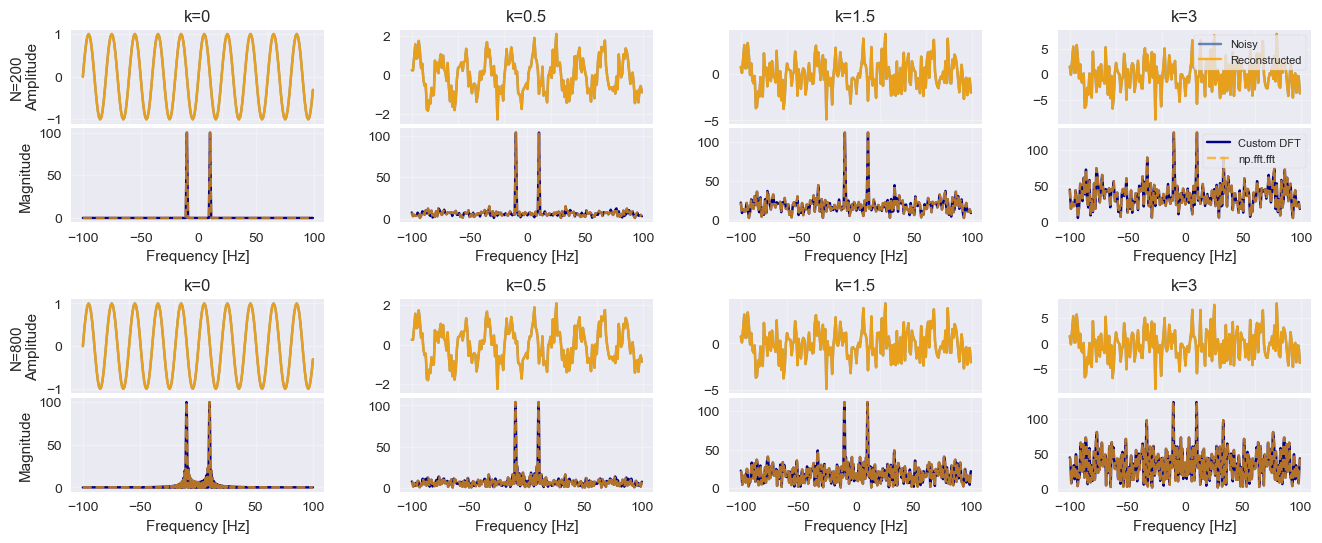

In [10]:
fig = plt.figure(figsize=(4*len(k_dft), 3*len(N_dft)))
outer = gridspec.GridSpec(len(N_dft), len(k_dft), wspace=0.3, hspace=0.4)

print("Comparison with numpy.fft:\n")
for i, N in enumerate(N_dft):
    for j, k_val in enumerate(k_dft):
        # Sinal ruidoso
        x_noisy = x_dft + k_val * noise_dft

        # DFT e IDFT com Numba
        X_numba = DFT_numba(x_noisy, N)    
        x_rec_numba = IDFT_numba(X_numba, N)
        X_numba = np.fft.fftshift(X_numba)

        # numpy.fft e numpy.fft.ifft
        X_np = np.fft.fft(x_noisy, n=N)
        x_rec_np = np.fft.ifft(X_np)
        X_np = np.fft.fftshift(X_np)

        # Métrica de erro espectro e sinal recuperado
        if(N == max(N_dft) and k_val == max(k_dft)):

            print(f"Comparação com numpy.fft para N = {N} e k = {k_val}\n")

            spectral_metric = rel_rmse(X_numba, X_np)
            spectral_fase_metric = phase_metrics(X_numba, X_np)['phase_RMSE']
            mod_rec_metric = rel_rmse(np.abs(x_rec_numba), np.abs(x_rec_np))
            phase_rec_metric = phase_metrics(x_rec_numba, x_rec_np)['phase_RMSE']

            print("Numba:")
            print(f"RMSE relativo entre espectros:\n    Módulo: {spectral_metric:12.4e}\n    Fase: {spectral_fase_metric:12.4e}")
            print(f"RMSE relativo entre sinais recuperados:\n    Módulo: {mod_rec_metric:12.4e}\n    Fase: {phase_rec_metric:12.4e}")

            # DFT e IDFT padrão em laço
            X = DFT(x_noisy, N)    
            x_rec = IDFT(X, N).real
            X = np.fft.fftshift(X)

            spectral_metric = rel_rmse(X, X_np)
            spectral_fase_metric = phase_metrics(X, X_np)['phase_RMSE']
            mod_rec_metric = rel_rmse(np.abs(x_rec), np.abs(x_rec_np))
            phase_rec_metric = phase_metrics(x_rec, x_rec_np)['phase_RMSE']

            print("Padrão:")
            print(f"RMSE relativo entre espectros:\n    Módulo: {spectral_metric:12.4e}\n    Fase: {spectral_fase_metric:12.4e}")
            print(f"RMSE relativo entre sinais recuperados:\n    Módulo: {mod_rec_metric:12.4e}\n    Fase: {phase_rec_metric:12.4e}")

            # DFT e IDFT com CuPy
            X_cupy = DFT_cupy(x_noisy, N)
            x_rec_cupy = IDFT_cupy(X_cupy, N)
            X_cupy = cp.fft.fftshift(X_cupy)
            
            spectral_metric = rel_rmse_cupy(X_cupy, cp.asarray(X_np)).item()
            spectral_fase_metric = phase_metrics(cp.asnumpy(X_cupy), X_np)['phase_RMSE']
            mod_rec_metric = rel_rmse_cupy(x_rec_cupy, cp.asarray(x_rec_np)).item()
            phase_rec_metric = phase_metrics(cp.asnumpy(x_rec_cupy), x_rec_np)['phase_RMSE']

            print("CuPy:")
            print(f"RMSE relativo entre espectros:\n    Módulo: {spectral_metric:12.4e}\n    Fase: {spectral_fase_metric:12.4e}")
            print(f"RMSE relativo entre sinais recuperados:\n    Módulo: {mod_rec_metric:12.4e}\n    Fase: {phase_rec_metric:12.4e}")

        # Eixo da frequência
        freqs_dft = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs_dft))
        
        # ------- Plotting ------- #

        # Grid interno
        inner = gridspec.GridSpecFromSubplotSpec(
            2, 1, subplot_spec=outer[i, j],
            height_ratios=[1, 1], hspace=0.05
        )

        # Eixo do tempo
        ax_time = plt.Subplot(fig, inner[0])
        ax_time.plot(n_dft, np.real(x_noisy), label='Noisy', alpha=0.85)
        ax_time.plot(n_dft, np.real(x_rec_numba[:L_dft]), label='Reconstructed', alpha=0.85, color='orange')
        if j == 0:
            ax_time.set_ylabel(f'N={N}\nAmplitude')
        ax_time.set_xticklabels([])  
        ax_time.grid(True, alpha=0.3)
        ax_time.set_title(f'k={k_val}')
        if i == 0 and j == len(k_dft) - 1:
            ax_time.legend(fontsize=8, loc='upper right', frameon=True)
        fig.add_subplot(ax_time)

        # Eixo da frequência
        ax_freq = plt.Subplot(fig, inner[1])
        ax_freq.plot(freqs_dft, np.abs(X_numba), color='darkblue')
        ax_freq.plot(freqs_dft, np.abs(X_np), linestyle='--', color='orange', alpha=0.7)
        ax_freq.set_xlabel('Frequency [Hz]')
        if j == 0:
            ax_freq.set_ylabel('Magnitude')
        if i == 0 and j == len(k_dft) - 1:
            ax_freq.legend(['Custom DFT', 'np.fft.fft'], fontsize=8, loc='upper right', frameon=True)
        ax_freq.grid(True, alpha=0.3)
        fig.add_subplot(ax_freq)

#fig.suptitle("Figura 1: Gráfico comparativo dos resultados obtidos por DFT_numba() e IDFT_numba()", fontsize=14)

plt.show()

---
Os resultados numéricos mostram que o RMSE relativo entre o espectro obtido por cada função implementada e pela função do *numpy* foram da ordem de $10^{-11}$, ou inferior, para 800 amostras e fator multiplicativo de ruído $k = 3$. Tanto para o módulo, como para a fase do espectro. Esses resutados indicam que o algoritmo está calculano corretamente o espectro do sinal ruidoso fornecido. 

De forma semelhante, o RMSE relativo entre o sinal original $x[n]$ e o sinal recuperado por cada função implementada é da ordem de $10^{-12}$ ou inferior. Esse resultado indica que a implementação da transformada inversa por meio da equação (1.8) está recuperando com alta precisão o sinal a partir do seu .

A semelhança entre os sinais no tempo e o módulo de seus espectros é ilustrada na figura 1, onde é possível notar que a precisão se manteve para todos os valores de *N* e *k*.

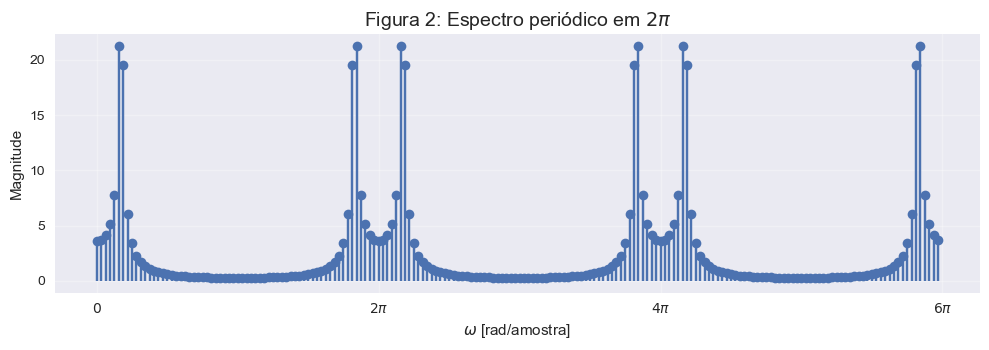

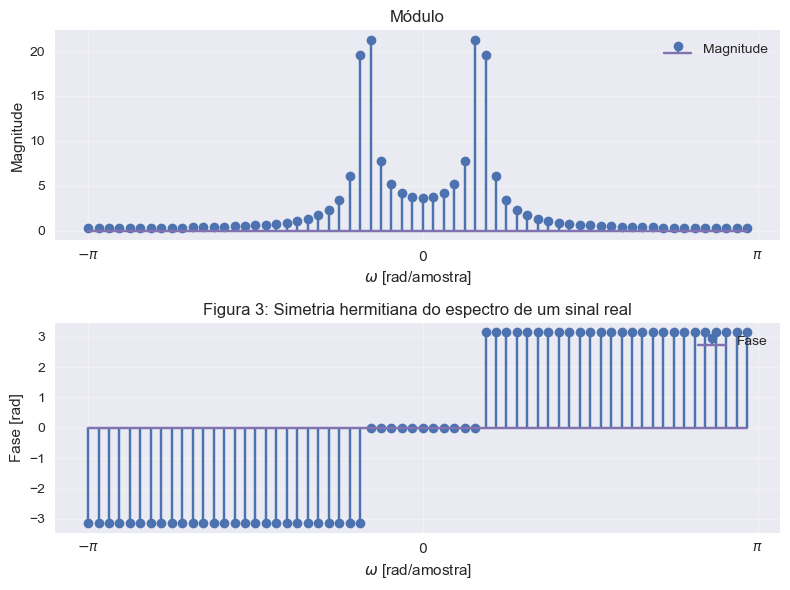

In [11]:
# 1) Periodicidade
fig1, ax1 = plt.subplots(figsize=(10, 3.6))
ax1.stem(omega_periodic, np.abs(X_periodic), basefmt=" ", linefmt='C0-', markerfmt='C0o')
ax1.set_title('DFT periódica (0 a 6π)')
ax1.set_xlabel(r'$\omega$ [rad/amostra]')
ax1.set_ylabel('Magnitude')
ax1.set_xticks([0, 2*np.pi, 4*np.pi, 6*np.pi])
ax1.set_xticklabels([r'$0$', r'$2\pi$', r'$4\pi$', r'$6\pi$'])
ax1.grid(True, alpha=0.3)
plt.title(r"Figura 2: Espectro periódico em $2\pi$", fontsize=14)
plt.tight_layout()
plt.show()


# 2) Simetria hermitiana 
fig2, (ax2, ax3) = plt.subplots(2, 1, figsize=(8, 6))

# --- Magnitude ---
ax2.stem(omega_centered, np.abs(X_centered),'C0-', label='Magnitude')
ax2.set_title('Módulo')
ax2.set_xlabel(r'$\omega$ [rad/amostra]')
ax2.set_ylabel('Magnitude')
ax2.set_xticks([-np.pi, 0, np.pi])
ax2.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax2.grid(True, alpha=0.3)
ax2.legend(loc = 'upper right')

# --- Fase ---

# Máscara para ignorar valores com magnitude muito pequena
mask = (np.abs(X_centered) > 1e-10)
phase_my = np.unwrap(np.angle(X_centered[mask]))


ax3.stem(omega_centered[mask], phase_my, 'C0-', label='Fase')
ax3.set_title('Fase')
ax3.set_xlabel(r'$\omega$ [rad/amostra]')
ax3.set_ylabel('Fase [rad]')
ax3.set_xticks([-np.pi, 0, np.pi])
ax3.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax3.grid(True, alpha=0.3)
ax3.legend(loc = 'upper right')

plt.title("Figura 3: Simetria hermitiana do espectro de um sinal real")
plt.tight_layout()
plt.show()

---
Na figura 2, é ilustrada a periodicidade do espectro discreto de um sinal, em torno dos múltiplos da frequência de amostragem, normalizada a $2\pi$. É possível visualiza também a simetria do módulo do espectro, que, evidentemente, ocorre tamém em torno dos mútiplos da frequência e amostragem

Na figura 3, é evidenciada a simetria heritiana do espectro de um sinal real no tempo, onde o módulo é simétrico em torno de 0, e a fase é antissimétrica.

<a id="32-convolucao-circular"></a>
## 3.2 Convolução circular

RMSE relativo entre partes reais da convolução linear e circular equivalente:   9.5275e-16
RMSE relativo entre partes imaginárias da convolução linear e circular equivalente:   7.3329e-16


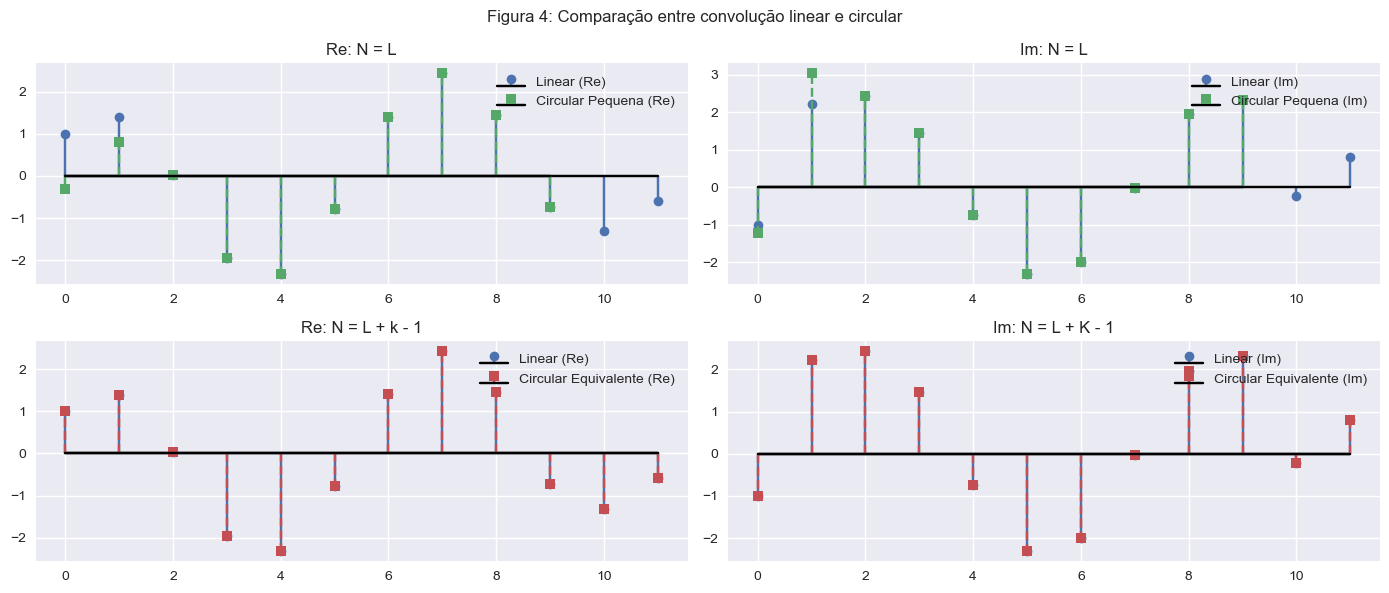

In [12]:
print(f"RMSE relativo entre partes reais da convolução linear e circular equivalente: {rmse_real:12.4e}")
print(f"RMSE relativo entre partes imaginárias da convolução linear e circular equivalente: {rmse_img:12.4e}")

# --- Plotting --- 
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.stem(np.real(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Re)')
plt.stem(np.real(circ_conv_small), linefmt='C1--', markerfmt='C1s', basefmt='k', label='Circular Pequena (Re)')
plt.title('Re: N = L')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(np.imag(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Im)')
plt.stem(np.imag(circ_conv_small), linefmt='C1--', markerfmt='C1s', basefmt='k', label='Circular Pequena (Im)')
plt.title('Im: N = L')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(np.real(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Re)')
plt.stem(np.real(circ_conv_exact), linefmt='C2--', markerfmt='C2s', basefmt='k', label='Circular Equivalente (Re)')
plt.title('Re: N = L + k - 1')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(np.imag(lin_conv), linefmt='C0-', markerfmt='C0o', basefmt='k', label='Linear (Im)')
plt.stem(np.imag(circ_conv_exact), linefmt='C2--', markerfmt='C2s', basefmt='k', label='Circular Equivalente (Im)')
plt.title('Im: N = L + K - 1')
plt.legend(loc='upper right')
plt.grid(True)

plt.suptitle("Figura 4: Comparação entre convolução linear e circular")
plt.tight_layout()
plt.show()

---

A figura 4, mostra como a convolução cirular quando $N$ = $L$ é diferente da convolução linear, e logo, não há validade para implementação. no entanto, não há diferença visivel para $N = L + K - 1$, o que sugere que as convoluções se tornam equivalentes para esse número de amostras da transformada. Esse resultado é validado pelos valores obtidos pelao RMSE realito entre os vetores da convolução linear e circular com $N$ suficiente, que foi da ordem de $10^{-16}$ para ambas as partes real e imaginária do vetor.

<a id="34-fft"></a>
## 3.4 FFT

In [13]:
# Executar teste
valida_fft(1024, reps=5)

Numba:
RMSE relativo entre espectros:
    Módulo:   4.4687e-15
    Fase:   8.6692e-15
RMSE relativo entre sinal recuperado e original:
    Módulo:   5.8324e-15
    Fase:   1.3528e-14

Padrão:
RMSE relativo entre espectros:
    Módulo:   4.4687e-15
    Fase:   8.6692e-15
RMSE relativo entre sinal recuperado e original:
    Módulo:   5.8324e-15
    Fase:   1.3528e-14


---
Os resultados numéricos apontam RMSEs relativos da ordem de $10^{-14}$ ou inferior para módulo e fase, tanto para os espectros obtidos pelas funções *FFT* e *FFT_numba*, quando comparadas à função *numpy.fft.fft*, como para os sinais no tempo recuperados pelas funções *IFFT* e *IFFT_numba*, quand comparadas ao sinal discreto original. Esses resultados evidenciam a capacidade das funções implementadas de calcularem o espectro de um sinal e o recuperarem com alta precisão numérica.

### Análise computacional (DFT e FFT)


Tempo de execução para N = 20:
  DFT em laço:                  0.000140 s
  DFT em laço com Numba:        0.000083 s
  DFT vetorizada com CuPy:      0.000389 s
  FFt em laço:                  0.000068 s
  FFT em laço com Numba:        0.000091 s
  NumPy:                        0.000022 s

Tempo de execução para N = 8000:
  DFT em laço:                  17.604947 s
  DFT em laço com Numba:        0.163100 s
  DFT vetorizada com CuPy:      0.000477 s
  FFt em laço:                  0.029048 s
  FFT em laço com Numba:        0.000609 s
  NumPy:                        0.000170 s


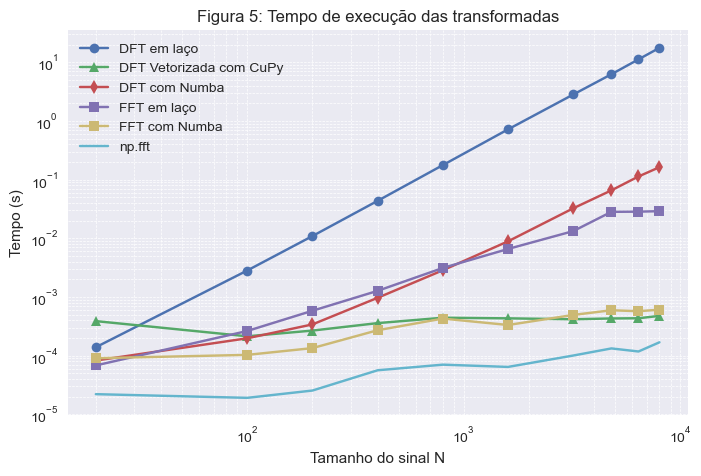

In [16]:
idxs = [0, -1]

for idx in idxs:
    n = sizes[idx]

    print(f"\nTempo de execução para N = {n}:")
    print(f"  DFT em laço:                  {times_dft[idx]:.6f} s")
    print(f"  DFT em laço com Numba:        {times_dft_numba[idx]:.6f} s")
    print(f"  DFT vetorizada com CuPy:      {times_dft_cupy[idx]:.6f} s")
    print(f"  FFt em laço:                  {times_fft[idx]:.6f} s")
    print(f"  FFT em laço com Numba:        {times_fft_numba[idx]:.6f} s")
    print(f"  NumPy:                        {times_numpy[idx]:.6f} s")

plt.figure(figsize=(8,5))
plt.plot(sizes, times_dft, 'o-', label="DFT em laço")
plt.plot(sizes, times_dft_cupy, '^-', label="DFT Vetorizada com CuPy")
plt.plot(sizes, times_dft_numba, 'd-', label="DFT com Numba")
plt.plot(sizes, times_fft, 's-', label="FFT em laço")
plt.plot(sizes, times_fft_numba, 's-', label="FFT com Numba")
plt.plot(sizes, times_numpy, 'x-', label="np.fft")

plt.xlabel("Tamanho do sinal N")
plt.ylabel("Tempo (s)")
plt.title("Figura 5: Tempo de execução das transformadas")

# Escalas logarítmicas
plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

---
A partir dos tempos de execução para $N = 20$ e $N = 8000$, evidencia-se a tendência esperada do aumento do tempo de execução com o número de amostras. Além disso, nota-se que a relação desse crescimento é maior no algoritmo da DFT, quando comparada ao da FFT com decimação na frequência. Além disso, percebe-se que o tempo de execução cresceu em diferentes proporções ao aplicar-se as técnicas de aceleração de código.

A relação do tempo de execução com o aumento no número de amostras do sinal é melhor apresentado, com mais detalhes, no gráfico da figura 5. Nele, é possível analisar como os diferentes métodos de aceleração reagem ao aumento do número de amostras do sinal,e evidencia-se uma escalabilidade intermediária dos algoritmos da FFT e da DFT acelerado com *Numba*. Dentre as funções implementadas, aquelas que apresentaram melhor performance foram a DFT vetorizada rodando em GPU e o algoritmo da FFT acelerado com *Numba*, pois cresceram com menor taxa com o número de amostras do sinal.